# Lecture 4

#### import 패널

In [1]:
#import용 패널
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

## 표본분포

### 1. 정규분포

In [2]:
# 확률변수 X ~ N(42, 5^2)에 대해, P(X=40)을 구하시오.
from scipy.stats import norm
norm.pdf(40, 42, 5)

0.07365402806066466

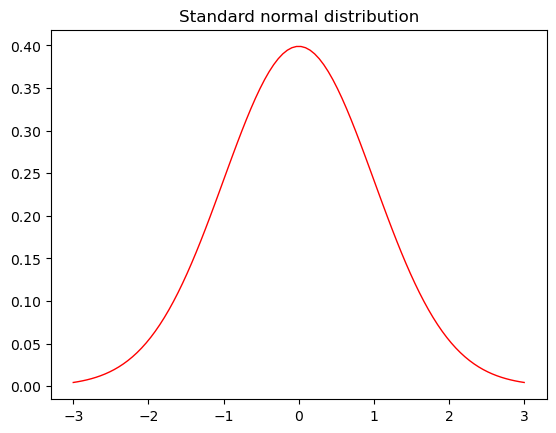

In [3]:
# X ~ N(0, 1) 그리기
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(-3,	3, 100,	endpoint=True)	
fx = norm.pdf(x,loc = 0, scale = 1)
plt.plot(x,	fx,	color =	"red",	linewidth=1.0, linestyle="-")
plt.title("Standard normal distribution")
plt.show()

In [4]:
# 전구 수명 X ~ N(2000, 200^2), Estimate P(X<=2500)
norm.cdf(2500, loc = 2000, scale = 200)

0.9937903346742238

In [5]:
# Estimate P(X>=1800)
1 - norm.cdf(1800, 2000, 200)

0.8413447460685429

In [6]:
#정규분위수 계산하기, IQtest X ~ N(100, 15^2) Estimate x which P(X<=x) = 0.98
norm.ppf(0.98, loc=100, scale=15) # norm.ppf(q, loc, scale)

130.80623365947733

In [7]:
# 랜덤표본 생성하기
norm.rvs(42, 5, 10)

array([43.61383048, 44.89728373, 45.34228121, 42.73433938, 42.74420908,
       35.61853267, 46.31528909, 30.90994295, 40.86031282, 40.36739401])

### 2. 이항분포

In [8]:
from scipy.stats import binom
binom.pmf(3, 10, 0.5)

0.1171875

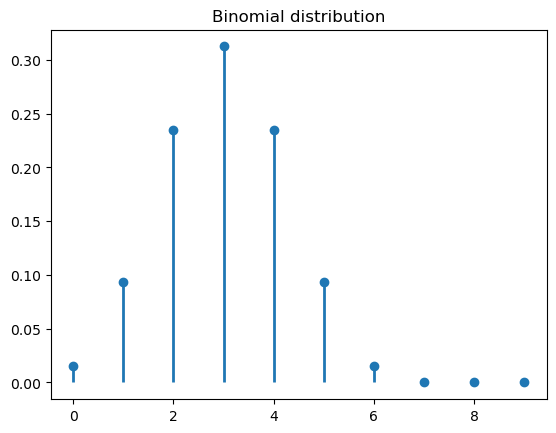

In [9]:
# 이항분포 X ~ B(6, 0.5)의 확률밀도함수 그리기
x= np.arange(0,10)
px=binom.pmf(x,	n=6, p=0.5)
plt.plot(x,	px, 'C0o')
plt.vlines(x,0,	px,	color="C0",	linewidth=2.0)	
plt.title("Binomial distribution")
plt.show()

In [10]:
# 불량률 10%의 표본 5개 추출 3개 불량품일 확률
binom.pmf(3, n=5, p=0.1)

0.0081

In [11]:
# 20 표본 중 불량품이 5개 이하일 확률
binom.cdf(5, n=20, p=0.1)

0.988746865835491

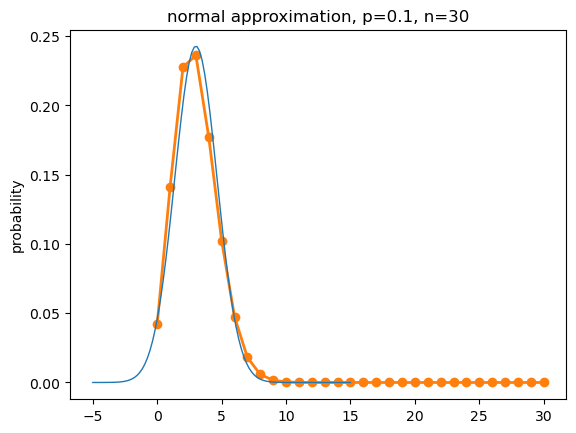

In [12]:
# 이항분포의 정규근사 연습
p=0.1; n=30

# 이항분포의 그래프를 그리자
k = np.arange(0, n+1)
px = binom.pmf(k, n=n, p=p)
plt.plot(k, px, "C1o", linewidth=1.0)
plt.plot(k, px, color="C1", linewidth=2.0)

# 근사된 정규분포의 그래프를 그리자
x = np.linspace(-5, 15, 100, endpoint=True)
mu= n * p # barX ~ N(mu, sigma^2)
sd = np.sqrt(n * p * (1-p))
fx = norm.pdf(x, loc = mu, scale = sd) # 1sigma까지 그리기!
plt.plot(x, fx, color = "C0", linewidth=1.0, linestyle="-")
plt.title("normal approximation, p=0.1, n=%d"%n)
plt.ylabel("probability")

plt.show()

### 3. 표본평균의 분포

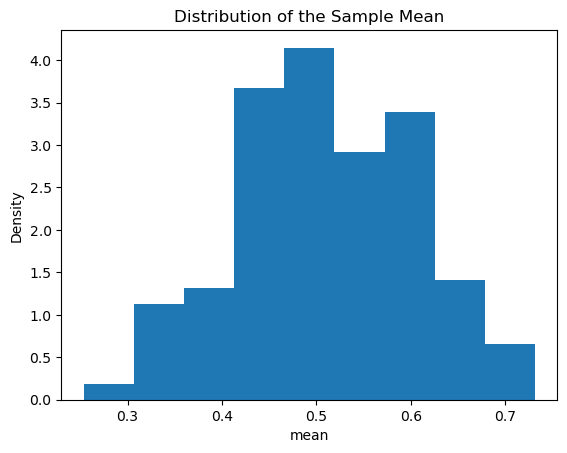

In [15]:
# 균등분포 U(0,1)에서 10개 표본 추출해 표본 평균을 200번 구하고, 이들의 평균들을 히스토그램으로 나타내보자.
from scipy.stats import uniform

np.random.seed(1)

n=10
mean=[]

for i in range(200):
    x = uniform.rvs(loc=0, scale=1, size=n)
    mean.append(x.mean())

plt.hist(mean, bins=9, density=True, histtype='bar')

plt.title("Distribution of the Sample Mean")
plt.xlabel("mean")
plt.ylabel("Density")
plt.show()

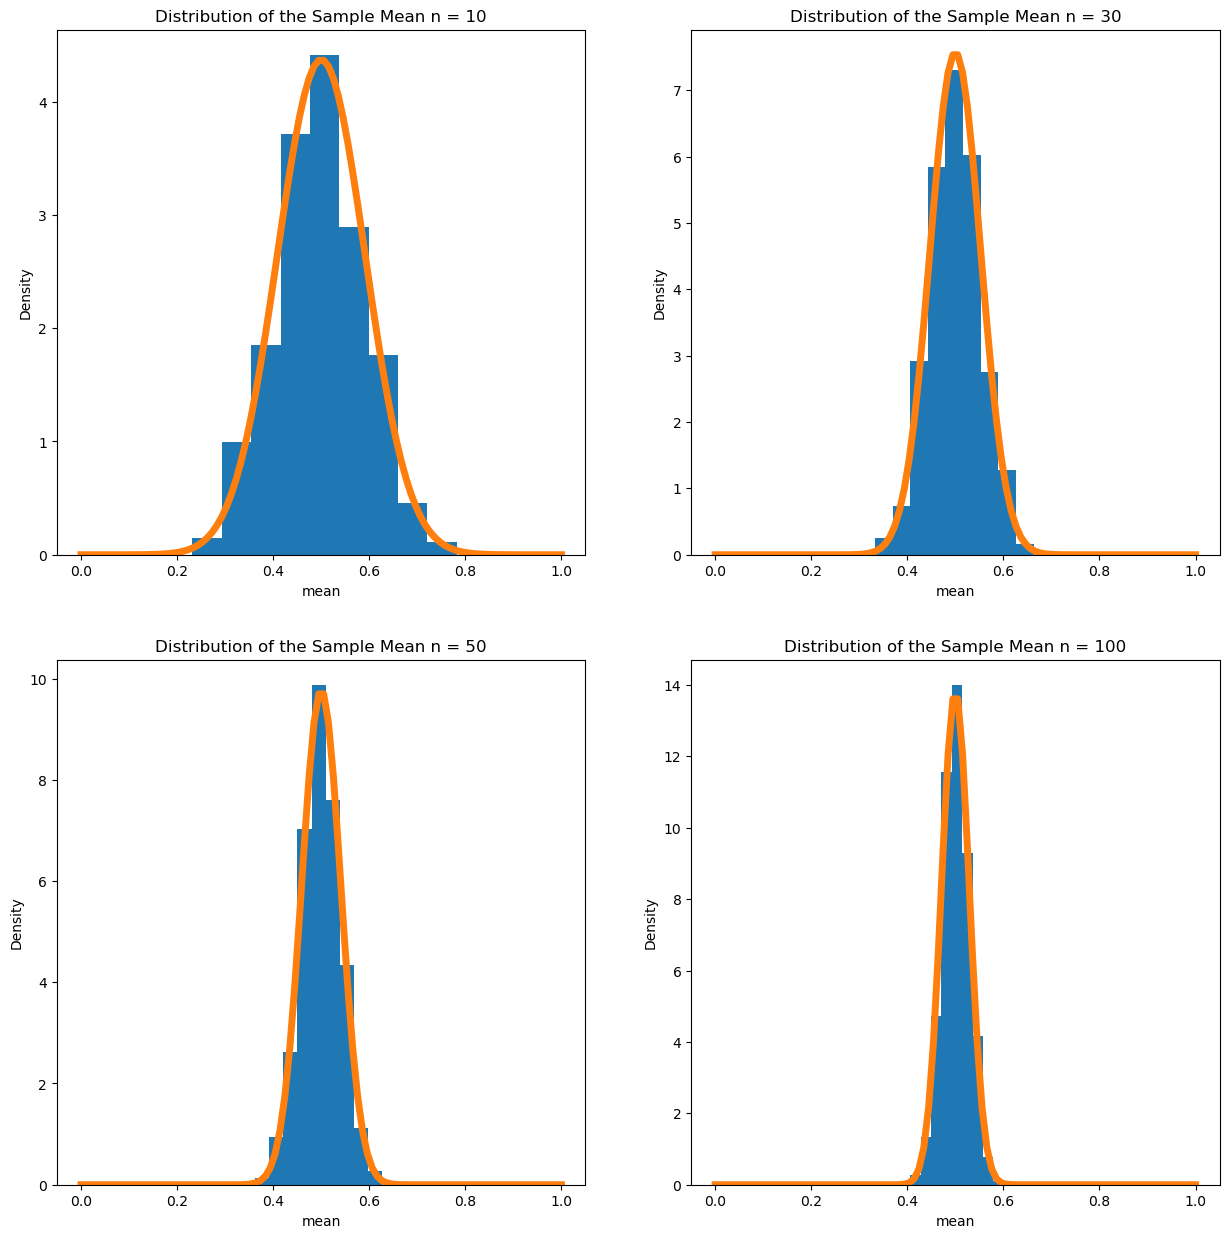

In [17]:
np.random.seed(1)
n = [10, 30, 50, 100]

plt.figure(figsize=(15, 15)) # 그래프 크기 지정

for i in range(4):
    plt.subplot(2, 2, i+1) # 그래프는 4개를 그릴 거에요!

    mean=[]

    for j in range(1000): # 각 표본의 크기별로 1000번씩 반복
        x = uniform.rvs(loc=0, scale=1, size=n[i])
        mean.append(x.mean())
    
    plt.hist(mean, bins=9, color="C0", density=True, histtype='bar')
    plt.title("Distribution of the Sample Mean n = %i" % n[i])
    plt.xlabel("mean")
    plt.ylabel("Density")

    x = np.linspace(0, 1, 100, endpoint=True)
    mu = 0.5 # 균등분포 U(0, 1)의 모평균
    sd= np.sqrt(1/12) # 균등분포 U(0, 1)의 모표준편차
    fx = norm.pdf(x, loc=mu, scale = sd/np.sqrt(n[i]))
    plt.plot(x, fx, color="C1", linewidth=5.0, linestyle="-")

plt.show()



### 4. 자료를 이용한 예제 : ames.csv

주어진 자료는 Iowa의 도시 Ames의 2006년부터 2010년 사이의 부동산 거래내역 자료이다. 5년 동안 이 지역에서 발생한 총 2930건의 부동산 거래내역이 모두 기록되어 있다. 자료에 대한 자세한 설명은 다음을 참조한다. (http://www.openintro.org/stat/data/?data=ames)

예제 1. 현재 주어진 자료는 일정 기간동안 지역 내의 모든 부동산 거래를 기록한 자료이므로 일종의 모집단이라고 생각할 수 있다. SalePrice 변수에 대해 히스토그램을 그려보고 수치적 요약값을 구해보자. 모집단의 분포는 어떠한가?

예제 2. 이 지역에서 발생한 전체 부동산 거래 가격의 평균값($\mu$)을 추정해보려고 한다. 지금처럼 모집단 전체를 알게 되는 경우는 매우 드물기 때문에 대부분의 경우에는 모집단의 부분집합인 표본을 선택하여 모수를 추정하게 된다. SalePrice에서 50개의 랜덤 표본을 선택해보자. 이 때, 모평균의 추정값은 무엇인가?

예제 3. 예제 2의 과정을 5000번 반복하여 표본 평균의 표본 분포를 구해보자. 즉, 크기가 50인 랜덤 표본을 선택하여 표본평균을 구하는 과정을 5000번 반복하고 이 결과를 sample_mean50이라는 이름의 벡터에 저장을 한다. sample_mean50을 이용하여 히스토그램을 sample_mean50 그려보자. 표본 평균의 분포는 어떠한가?

예제 4. 예제 3의 sample_mean50의 평균과 분산을 계산해보자. sample_mean50의 평균값은 모집단의 평균과 어떠한 관계가 있는가? sample_mean50의 분산값은 모분산과 어떠한 관계가 있는가?

예제 5. 예제 3의 과정을 표본의 크기를 150으로 증가시켜 반복해보자. 이 결과는 sample_mean150에 저장한다. 표본의 크기에 따른 표본 평균의 분포는 어떠한가?